**Q.1.** You are given a binary tree. The binary tree is represented using the TreeNode class. Each TreeNode has an integer value and left and right children, represented using the TreeNode class itself. Convert this binary tree into a binary search tree.

```
Input:

        10

       /   \

     2      7

   /   \

 8      4

Output:

        8

      /   \

    4     10

  /   \

2      7
```

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def inorder(root, arr):
    if root:
        inorder(root.left, arr)
        arr.append(root.val)
        inorder(root.right, arr)

def array_to_bst(arr, root):
    if root:
        array_to_bst(arr, root.left)
        root.val = arr.pop(0)
        array_to_bst(arr, root.right)

def convert_to_bst(root):
    arr = []
    inorder(root, arr)
    arr.sort()
    array_to_bst(arr, root)

root = TreeNode(10)
root.left = TreeNode(2)
root.right = TreeNode(7)
root.left.left = TreeNode(8)
root.left.right = TreeNode(4)

convert_to_bst(root)

arr = []
inorder(root, arr)
print(arr)

[2, 4, 7, 8, 10]


**Q.2.** Given a Binary Search Tree with all unique values and two keys. Find the distance between two nodes in BST. The given keys always exist in BST.

**Example:**

Consider the following BST:

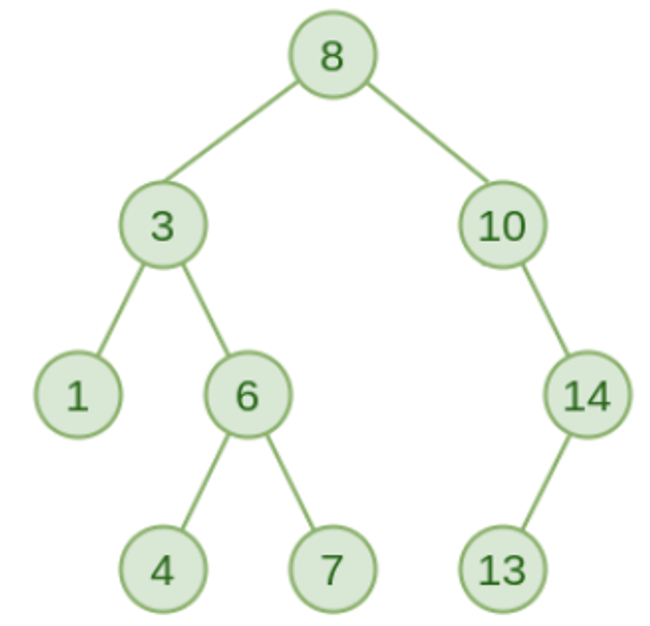

```
Input-1: n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node1 = 6

node2 = 14

Output-1: The distance between the two keys = 4

Input-2: n = 9

values = [8, 3, 1, 6, 4, 7, 10, 14,13]

node1 = 3

node2 = 4

Output-2: The distance between the two keys = 2
```

In [2]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

def insert(root, key):
    if root is None:
        return Node(key)
    if key < root.key:
        root.left = insert(root.left, key)
    else:
        root.right = insert(root.right, key)
    return root

def lca(root, n1, n2):
    if root is None:
        return None
    if root.key > n1 and root.key > n2:
        return lca(root.left, n1, n2)
    if root.key < n1 and root.key < n2:
        return lca(root.right, n1, n2)
    return root

def distance_from_root(root, x):
    if root.key == x:
        return 0
    elif root.key > x:
        return 1 + distance_from_root(root.left, x)
    return 1 + distance_from_root(root.right, x)

def distance_between_nodes(root, n1, n2):
    common_ancestor = lca(root, n1, n2)
    d1 = distance_from_root(common_ancestor, n1)
    d2 = distance_from_root(common_ancestor, n2)
    return d1 + d2

values = [8, 3, 1, 6, 4, 7, 10, 14,13]
root = None
for value in values:
    root = insert(root, value)

node1 = 3
node2 = 4
print(distance_between_nodes(root, node1, node2))

2


**Q.3.** Write a program to convert a binary tree to a doubly linked list.

```
Input:

        10

       /   \

     5     20

           /   \

        30     35

Output: 5 10 30 20 35
```

In [3]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

def binary_tree_to_doubly_linked_list(root):
    if root is None:
        return None, None
    left_head, left_tail = binary_tree_to_doubly_linked_list(root.left)
    right_head, right_tail = binary_tree_to_doubly_linked_list(root.right)
    if left_tail:
        left_tail.right = root
        root.left = left_tail
    if right_head:
        right_head.left = root
        root.right = right_head
    head = left_head if left_head else root
    tail = right_tail if right_tail else root
    return head, tail

def print_doubly_linked_list(head):
    current = head
    while current:
        print(current.data, end=' ')
        current = current.right

root = Node(10)
root.left = Node(5)
root.right = Node(20)
root.right.left = Node(30)
root.right.right = Node(35)

head, _ = binary_tree_to_doubly_linked_list(root)
print_doubly_linked_list(head)

5 10 30 20 35 

**Q.4.** Write a program to connect nodes at the same level.

```
Input:

        1

      /   \

    2      3

  /   \   /   \

4     5 6    7

Output:

1 → -1

2 → 3

3 → -1

4 → 5

5 → 6

6 → 7

7 → -1
```

In [4]:
from collections import deque

class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.next_right = None

def connect_nodes_at_same_level(root):
    if root is None:
        return
    q = deque([root])
    while q:
        size = len(q)
        prev = None
        for _ in range(size):
            node = q.popleft()
            if prev:
                prev.next_right = node
            prev = node
            if node.left:
                q.append(node.left)
            if node.right:
                q.append(node.right)

def print_connections(root):
    if root is None:
        return
    print_connections(root.left)
    next_right_data = root.next_right.data if root.next_right else -1
    print(f'{root.data} -> {next_right_data}')
    print_connections(root.right)

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
root.right.left = Node(6)
root.right.right = Node(7)

connect_nodes_at_same_level(root)
print_connections(root)

4 -> 5
2 -> 3
5 -> 6
1 -> -1
6 -> 7
3 -> -1
7 -> -1
